This notebook generates Figure 2a in the Sei framework manuscript, showing the logFC enrichment of sequence classes for various genomic annotations (including the Cistrome DB tracks, Roadmap Epigenomics tracks, and RepeatMasker centromere annotation).

In [1]:
from collections import defaultdict
import glob
import os

import h5py
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.colors import SymLogNorm
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
RESOURCES_DIR = '../resources'
DATA_DIR = './data'
SEI_DIR = './sei_data'
FIGS_DIR = './figures'

In [4]:
SC_NAMES_FILE = os.path.join(RESOURCES_DIR, 'cnames.tsv')
df = pd.read_csv(SC_NAMES_FILE, sep='\t')
df.head()
MAPPING = {}
for row in df.itertuples():
    MAPPING[row.index] = '{0} {1}'.format(row.ID, row.name)

### Sei chromatin profile enrichments

In [5]:
signif_enrichment_df = pd.read_csv(
    os.path.join(SEI_DIR, 'significant_chromatin_profiles.fishers.tsv'),
    sep='\t',
    index_col=0)
signif_enrichment_df.head()

,sequence_class,sequence_class_name,chromatin_profile,logFC_enrichment,pvalue
0,12,E5 B-cell-like,GM19201_Lymphoblastoid | H3K4me1 | ID:54938,4.582872,0.000000e+00
1,12,E5 B-cell-like,GM12878_B_Lymphocyte_Blood | EP300 | ID:47885,4.582367,0.000000e+00
2,12,E5 B-cell-like,GM12878_B_Lymphocyte_Blood | RELA | ID:4969,4.549074,0.000000e+00
3,12,E5 B-cell-like,GM12878_B_Lymphocyte_Blood | EP300 | ID:47884,4.547713,0.000000e+00
4,12,E5 B-cell-like,GM18951_Lymphoblastoid_Blood | RELA | ID:4964,4.527211,1.122984e-243


For all sequence classes in `TF_enrichment_select`, we select the top-enriched transcription factor (manually hard-coded here, matching up exactly with `signif_enrichment_df` reported enrichments). For almost all sequence classes, we picked the top enriched TF. For TF-specific sequence classes which often have multiple TFs co-located at the same sequences, we sometimes select the second or thirdmost enriched based on the dominant enrichment (e.g. The TF2 CEBPB sequence class is majority enriched in CEBPB but the topmost enriched chromatin profile is ATF4, so we selected the secondmost enriched CEBPB chromatin profile for visualization instead)

In [6]:
TF_enrichment_select = {
    12: ['GM12878_B_Lymphocyte_Blood | RELA | ID:4969'],
    16: ['Macrophage_Blood | SPI1 | ID:88936'],
    36: ['Jurkat_E6-1_T_Lymphocyte_Blood | RUNX1 | ID:1955'],
    38: ['Proerythroblast_Fetal_Liver | TAL1 | ID:33284'],
    5: ['iPS_cells_iPSC | POU5F1 | ID:86398'],
    7: ['501-Mel_Melanoma_Cell | SOX10 | ID:52549'],
    26: ['HepG2_Epithelium_Liver | HNF4A | ID:1448'],
    9: ['A549_Epithelium_Lung | FOSL2 | ID:62717'],
    13: ['Keratinocyte_Foreskin | TP53 | ID:44763'],
    27: ['LoVo_Colon | RAD21 | ID:42686', 'U2OS_Bone | CTCF | ID:72362'],
    37: ['VCaP_Epithelium_Prostate | AR | ID:69280'],
    19: ['LNCaP_Epithelium_Prostate | FOXA1 | ID:84345'],
    14: ['Mesenchymal_Stem_Cell | CEBPB | ID:54131'],
    31: ['D283_Med | OTX2 | ID:74361',],
    10: ['LNCaP_Epithelium_Prostate | NANOG | ID:71759']
}

In [7]:
enrichment_df = pd.read_csv(
    os.path.join(SEI_DIR, 'target_enrichments.aa.tsv'),
    sep='\t',
    index_col=0).T

In [8]:
rowlabels = []
TF_enrich_mat = []
for sc, sc_rls in TF_enrichment_select.items():
    rowlabels.extend(sc_rls)
    TF_enrich_mat.append(
        enrichment_df[sc_rls].iloc[list(MAPPING.keys())].T)

In [9]:
TF_data_df = pd.concat(TF_enrich_mat, axis=0)
TF_data_df.rename(index={
    l: rowlabels[i] 
    for (i, l) in enumerate(TF_data_df.index.tolist())}, inplace=True)
TF_data_df.head()

,12,16,36,38,5,30,7,26,6,9,...,14,31,10,8,18,22,24,33,1,4
GM12878_B_Lymphocyte_Blood | RELA | ID:4969,4.549074,-0.784954,-0.161679,-inf,-3.951742,-inf,-3.922099,-inf,-4.953018,1.507129,...,-3.671459,-inf,-inf,-inf,-inf,-0.757278,-inf,-inf,-inf,-4.994926
Macrophage_Blood | SPI1 | ID:88936,2.962545,4.287648,-0.870437,-inf,-2.853145,-inf,-inf,-inf,-2.854421,1.300872,...,-1.572862,-1.26413,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
Jurkat_E6-1_T_Lymphocyte_Blood | RUNX1 | ID:1955,3.612047,-0.493712,5.258846,1.772244,-1.853145,-inf,-inf,-inf,-inf,1.213409,...,-inf,-inf,-2.726323,-inf,-inf,-inf,-inf,-inf,-inf,-inf
Proerythroblast_Fetal_Liver | TAL1 | ID:33284,0.862305,-2.008989,0.199249,6.635478,-2.368422,-1.970391,-3.338779,-inf,-1.784735,0.698132,...,-3.088139,-inf,-inf,-inf,-inf,-2.758920,-inf,-1.591098,-3.916863,-3.411606
iPS_cells_iPSC | POU5F1 | ID:86398,0.920356,-inf,-inf,-inf,4.251023,-inf,-1.363190,-inf,-inf,-0.004351,...,-inf,-inf,-1.266011,-inf,-inf,-inf,-0.608409,-0.615510,-inf,-inf


### Roadmap Epigenomics histone mark enrichments

In [10]:
HIST_CA_MAPPING = {
    'H3K4me3': 'Promoter',
    'H3K4me1': 'Enhancer',
    'H4K20me1': 'Transcription',
    'H3K27ac': 'Enhancer',
    'H3K36me3': 'Transcription',
    'H3K27me3': 'Polycomb',
    'H3K4me2': 'Promoter',
    'H3K9me3': 'Heterochromatin',
    'H3K79me2': 'Transcription',
    'H3K9ac': 'Biv Promoters, Active Enh',
    'DNase': 'Chromatin Acc'
}

CLASS_ABBREV_MAPPING = {
    'P': 'Promoter',
    'E': 'Enhancer',
    'PC': 'Polycomb',
    'TN': 'Transcription',
    'HET': 'Heterochromatin',
    'CTCF': 'CTCF-cohesin',
    'TF': 'Transcription factor',
    'L': 'Low signal'
}


In [11]:
def get_track_enrichment(pwd):
    rowlabels = []
    data = []
    for fp in glob.glob(pwd + '/*bed.npy'):
        data.append(np.load(fp))
        fn = os.path.basename(fp)
        rowlabels.append(fn.split('.')[0])
    data = np.vstack(data)
    return data, rowlabels

regulatory_categories = set()
mark_infodict = defaultdict(dict)
for mark, desc in HIST_CA_MAPPING.items():
    pwd = os.path.join(
        SEI_DIR, 'roadmap_enrichments', '{0}_enrichment'.format(mark))
    if not os.path.exists(pwd):
        continue
    print(mark, desc)
    regulatory_categories.add(desc)
    mark_infodict[mark]['data'], mark_infodict[mark]['rowlabels'] = \
        get_track_enrichment(pwd)
regulatory_categories

H3K4me3 Promoter
H3K4me1 Enhancer
H3K27ac Enhancer
H3K36me3 Transcription
H3K27me3 Polycomb
H3K9me3 Heterochromatin
DNase Chromatin Acc


{'Chromatin Acc',
 'Enhancer',
 'Heterochromatin',
 'Polycomb',
 'Promoter',
 'Transcription'}

In [12]:
def num_split(s):
    head = s.rstrip('0123456789')
    tail = s[len(head):]
    return head, tail

regulatory_categ_classes = defaultdict(list)
categ_ordering = []
for c, desc in MAPPING.items():
    for r in regulatory_categories:
        classtype = CLASS_ABBREV_MAPPING[
            num_split(desc.split( )[0])[0]]
        if classtype != r: 
            continue
        
        regulatory_categ_classes[r].append(c)
        if len(categ_ordering) == 0 or r != categ_ordering[-1]:
            categ_ordering.append(r)
        
regulatory_categ_classes

defaultdict(list,
            {'Enhancer': [12, 16, 36, 38, 5, 30, 7, 26, 6, 9, 17, 13],
             'Promoter': [25],
             'Polycomb': [34, 0, 15, 20],
             'Heterochromatin': [11, 23, 29, 32, 35, 39],
             'Transcription': [2, 3, 21, 28]})

In [13]:
marks_ordered = []
categ_marks = defaultdict(list)
for c in categ_ordering:
    for m in mark_infodict.keys():
        if c == HIST_CA_MAPPING[m]:
            marks_ordered.append(m)
            categ_marks[c].append(m)
categ_marks

defaultdict(list,
            {'Enhancer': ['H3K4me1', 'H3K27ac'],
             'Promoter': ['H3K4me3'],
             'Polycomb': ['H3K27me3'],
             'Heterochromatin': ['H3K9me3'],
             'Transcription': ['H3K36me3']})

In [14]:
def select_celltype_subset(use_classes, fc_mat, rowlabels, select_N=None):
    sort_per_class = np.argsort(-1 * fc_mat[:, use_classes], axis=0)
    if select_N is None:
        select_N = [1] * len(use_classes)
    elif isinstance(select_N, int):
        select_N = [select_N] * len(use_classes)
    
    final_ixs = []
    for i, sorted_ixs in enumerate(sort_per_class.T):
        final_ixs.append(sorted_ixs[:select_N[i]])
    final_ixs = np.hstack(final_ixs)
    return fc_mat[final_ixs], rowlabels[final_ixs]

In [15]:
roadmap_select_data = []
roadmap_select_rls = []
for categ in categ_ordering:
    mark = categ_marks[categ][0]
    infodict = mark_infodict[mark]
    use_classes = regulatory_categ_classes[categ]
    select_N = [2] * len(use_classes) 
    final_dataset, final_rowlabels = select_celltype_subset(
        use_classes,
        infodict['data'],
        np.array(infodict['rowlabels']),
        select_N=select_N)
    final_rowlabels = ['{0} | {1}'.format(mark, r) 
                       for r in final_rowlabels]
    roadmap_select_data.append(final_dataset)
    roadmap_select_rls.append(final_rowlabels)
roadmap_select_data = np.vstack(roadmap_select_data)
roadmap_select_rls = np.hstack(roadmap_select_rls)

In [16]:
roadmap_data_df = pd.DataFrame(roadmap_select_data[:, list(MAPPING.keys())])

roadmap_data_df.rename(index={
    l: roadmap_select_rls[i] for (i, l) in enumerate(roadmap_data_df.index.tolist())}, inplace=True)
roadmap_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
H3K4me1 | GM12878_Lymphoblastoid,3.876269,0.717767,1.328979,-0.526631,-1.769089,-3.810671,-3.258163,-1.405697,-0.624538,1.404351,...,-3.843980,-3.171235,-5.337129,-4.532756,-4.484254,0.064377,-5.983278,-12.181665,-5.351039,-8.643361
H3K4me1 | CD19_Primary_Cells_Cord_BI,3.071474,1.538248,1.767838,-0.652594,-1.890592,-3.437901,-3.253698,-1.252574,-0.691079,0.804793,...,-3.067177,-2.856183,-4.454860,-3.007269,-3.100546,-0.232970,-5.278809,-9.676263,-4.255443,-6.895158
H3K4me1 | CD14_Primary_Cells,2.426650,2.727558,1.363539,0.086985,-1.520289,-2.979988,-2.593548,-0.518720,0.206865,1.576628,...,-1.242495,-2.307220,-4.177700,-2.419136,-2.229096,-1.004630,-4.261257,-5.288672,-3.667542,-6.757901
H3K4me1 | Monocytes-CD14+_RO01746,2.326176,2.590358,1.367174,0.057345,-1.474448,-2.851577,-2.459014,-0.505257,0.297578,1.517072,...,-1.162902,-2.162846,-3.727783,-2.366119,-2.225175,-0.813899,-4.104583,-5.608072,-3.429223,-6.226368
H3K4me1 | CD3_Primary_Cells_Cord_BI,2.872982,0.531156,3.514147,-0.191862,-1.028119,-2.563993,-2.228596,-1.060469,-0.359449,1.084157,...,-3.007646,-2.083819,-3.737824,-4.228488,-4.980638,-1.209160,-4.587326,-11.443289,-3.344576,-6.264223


### RepeatMasker centromere enrichment

In [17]:
rp_rowlabels = np.load(os.path.join(
    SEI_DIR, 'repeatmasker_enrichments', 'repeatmasker.labels_ordered.npy'))
rp_enrichments = np.load(
    os.path.join(SEI_DIR, 'repeatmasker_enrichments', 'repeatmasker.sclass_logfcs.npy')).T

# only visualize the centromere enrichment for now
use_rpt_labels = {
    'Satellite centr': 'Centromere',
}
row_ixs = [ix for (ix, rl) in enumerate(rp_rowlabels) if rl in use_rpt_labels]

In [18]:
rp_enrichments = rp_enrichments[row_ixs]
rp_data_df = pd.DataFrame(rp_enrichments[:, list(MAPPING.keys())])
rp_data_df.rename(index={i: use_rpt_labels[rp_rowlabels[l]] 
                            for (i, l) in enumerate(row_ixs)}, inplace=True)

## Figure 2a

/mnt/home/kchen/anaconda3/envs/sei-manu/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  app.launch_new_instance()
/mnt/home/kchen/anaconda3/envs/sei-manu/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
/mnt/home/kchen/anaconda3/envs/sei-manu/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
/mnt/home/kchen/anaconda3/envs/sei-manu/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


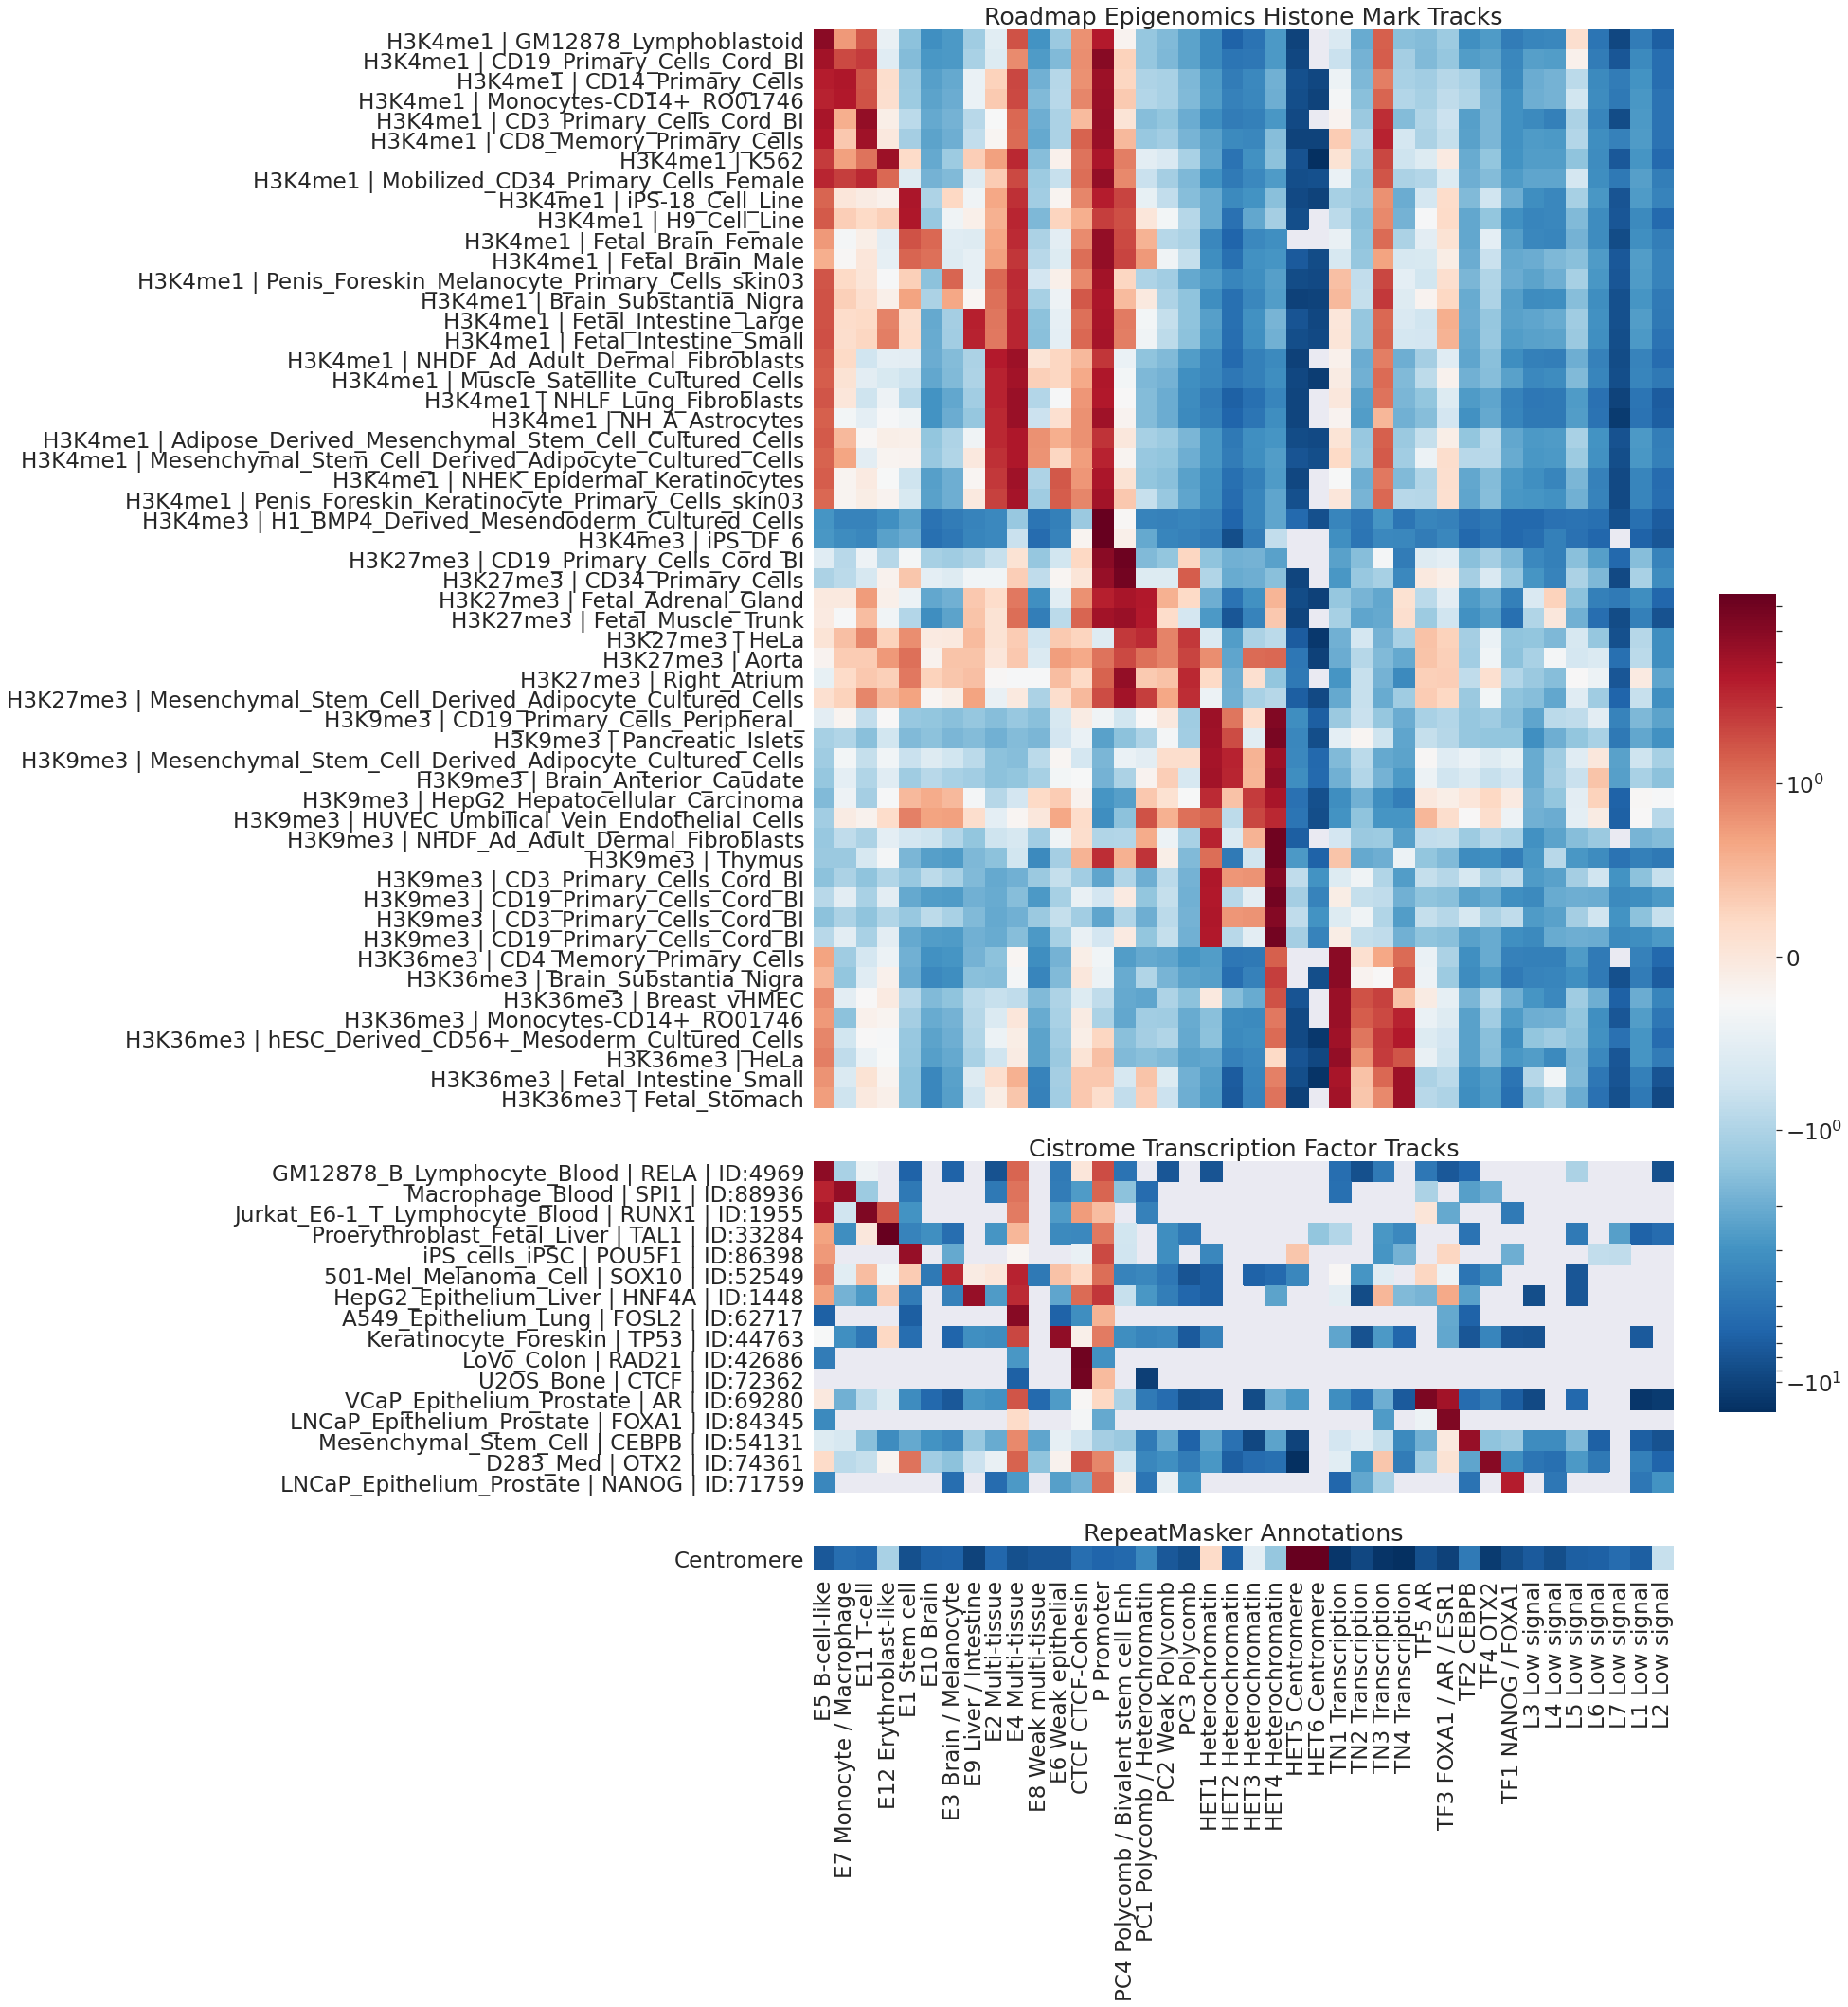

In [19]:
VMAX = 16  # manually checked the max/min logFC enrichment

sns.set(font_scale=2.1)
fig = plt.figure(figsize=(28, 30))
gs = gridspec.GridSpec(3, 1, height_ratios=[13, 4, 0.3]) 

xticks = list(MAPPING.values())
cbar_ax = fig.add_axes([.91, .3, .03, .4])

ax1 = plt.subplot(gs[0])
roadmap_data_df.columns = xticks
sns.heatmap(
    roadmap_data_df, annot=False, cmap='RdBu_r',
    xticklabels=False, yticklabels=1,
    cbar=False, ax=ax1,
    norm=SymLogNorm(linthresh=1, linscale=1), vmin=-VMAX, vmax=VMAX)
ax1.set_title('Roadmap Epigenomics Histone Mark Tracks')

ax2 = plt.subplot(gs[1])
TF_data_df.columns = xticks
sns.heatmap(
    TF_data_df, annot=False, cmap='RdBu_r',
    xticklabels=False, yticklabels=1, 
    cbar=False, ax=ax2,
    norm=SymLogNorm(linthresh=1, linscale=1), vmin=-VMAX, vmax=VMAX)
ax2.set_title('Cistrome Transcription Factor Tracks')

ax = plt.subplot(gs[2])
rp_data_df.columns = list(MAPPING.values())
sns.heatmap(
    rp_data_df, annot=False, cmap='RdBu_r',
    xticklabels=xticks, yticklabels=1,
    cbar=True, cbar_ax=cbar_ax, ax=ax,
    norm=SymLogNorm(linthresh=1, linscale=1), vmin=-VMAX, vmax=VMAX)
ax.set_title('RepeatMasker Annotations')
ax.set_yticklabels(['Centromere'], rotation=0)
fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig(os.path.join(FIGS_DIR, 'combined_enrichments_fig.pdf'),
             dpi=300)